In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [2]:
df1 = sns.load_dataset('tips')

In [4]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Handling Null Values 

In [5]:
df1 = DataFrame({'A':[1,np.nan,np.nan,np.nan],
                'B':[2,5,8,np.nan],
                'C':[3,6,np.nan,np.nan]})

In [6]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [7]:
df1.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,True,False,True
3,True,True,True


In [9]:
df1.notnull()

,A,B,C
0,True,True,True
1,False,True,True
2,False,True,False
3,False,False,False


In [10]:
df1.isnull().sum()

A    3
B    1
C    2
dtype: int64

In [11]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [13]:
df1.dropna() # By default axis is 0 i.e will check for null values row wise.

,A,B,C
0,1.0,2.0,3.0


In [14]:
df1.dropna(axis=0)

,A,B,C
0,1.0,2.0,3.0


In [16]:
df1.dropna(axis=1) # Axis 1 is for column wise operation.

""
0
1
2
3


In [18]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [17]:
df1.dropna(how='any') # Any one value as null - ( ANY)

,A,B,C
0,1.0,2.0,3.0


In [19]:
df1.dropna(how='all')  # All values are null ( ALL )

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [20]:
df1.dropna(how='all',axis=1) # Column wise and all values should be null.

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [21]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


### NOTE : Thresh is w.r.t non null values.

In [22]:
df1.dropna(thresh=1) 

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [23]:
df1.dropna(thresh=2)

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0


In [24]:
df1.dropna(thresh=3)

,A,B,C
0,1.0,2.0,3.0


In [25]:
df1.dropna(thresh=2,axis=1)

,B,C
0,2.0,3.0
1,5.0,6.0
2,8.0,NaN
3,NaN,NaN


In [26]:
df1.dropna(thresh=4)

,A,B,C


In [27]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


## Q1. Drop null values of data w.r.t null values in column B only.

In [28]:
df1.dropna(subset=['B'])

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN


In [29]:
df1.dropna(subset=['C'])

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0


In [30]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,NaN,NaN


In [31]:
df1.fillna(0)

,A,B,C
0,1.0,2.0,3.0
1,0.0,5.0,6.0
2,0.0,8.0,0.0
3,0.0,0.0,0.0


## Q2. Fill the null values of column B with Mean of Column B.

In [32]:
df1['B'] = df1['B'].fillna(df1['B'].mean())

In [33]:
df1

,A,B,C
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,NaN,8.0,NaN
3,NaN,5.0,NaN


# Outlier Removal with Zscore Technique

In [35]:
df1 = sns.load_dataset('tips')

In [36]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
from scipy.stats import zscore

In [42]:
df1['ZTB'] = zscore(df1['total_bill'])
df1.head(1)

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711


In [41]:
df1[(df1['ZTB']<-3) | (df1['ZTB']>3)]

,total_bill,tip,sex,smoker,day,time,size,ZTB
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [40]:
len(df1[(df1['ZTB']<-3) | (df1['ZTB']>3)])

4

In [43]:
len(df1[(df1['ZTB']>-3) & (df1['ZTB']<3)])

240

In [44]:
df2 = df1[(df1['ZTB']>-3) & (df1['ZTB']<3)]

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


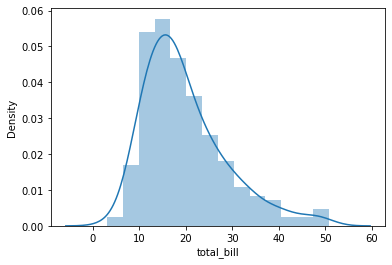

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


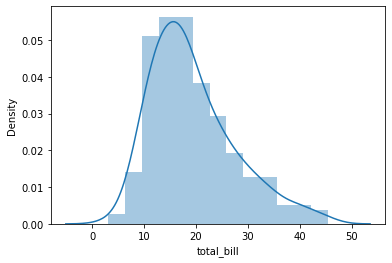

In [45]:
sns.distplot(df1['total_bill'])
plt.show()
sns.distplot(df2['total_bill'])
plt.show()

In [47]:
print("Skewness of Original Total Bill Column",df1['total_bill'].skew())
print("Skewness of Zscore Cleaned Data",df2['total_bill'].skew())

Skewness of Original Total Bill Column 1.1332130376158205
Skewness of Zscore Cleaned Data 0.9148510261489988


In [48]:
print("Kurtosis of Original Total Bill Column",df1['total_bill'].kurt())
print("Kurtosis of Zscore Cleaned Data",df2['total_bill'].kurt())

Kurtosis of Original Total Bill Column 1.2184840156638854
Kurtosis of Zscore Cleaned Data 0.5355590055930715


# Removal of Outliers w.r.t IQR Techique.

In [49]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [50]:
q1 = df1['total_bill'].quantile(0.25)
q2 = df1['total_bill'].quantile(0.5)
q3 = df1['total_bill'].quantile(0.75)

In [51]:
IQR = q3-q1

In [53]:
UL = q3 + 1.5*IQR
LL = q1 - 1.5*IQR

In [54]:
print('Upper Limit',UL)
print('Lower Limit',LL)

Upper Limit 40.29749999999999
Lower Limit -2.8224999999999945


In [56]:
len(df1[(df1['total_bill']<LL) |  (df1['total_bill']>UL)])

9

In [57]:
df3 = df1[(df1['total_bill']>LL) &  (df1['total_bill']<UL)]
len(df3)

235

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


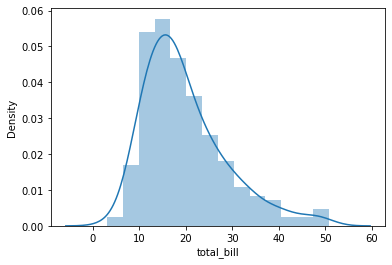

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


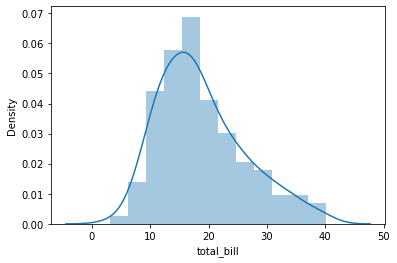

In [58]:
sns.distplot(df1['total_bill'])
plt.show()
sns.distplot(df3['total_bill'])
plt.show()

In [60]:
print("Skewness of Original Total Bill Column",df1['total_bill'].skew())
print("Skewness of Zscore Cleaned Data",df2['total_bill'].skew())
print("Skewness of IQR Cleaned Data",df3['total_bill'].skew())

Skewness of Original Total Bill Column 1.1332130376158205
Skewness of Zscore Cleaned Data 0.9148510261489988
Skewness of IQR Cleaned Data 0.7255976389840281


In [61]:
print("Kurtosis of Original Total Bill Column",df1['total_bill'].kurt())
print("Kurtosis of Zscore Cleaned Data",df2['total_bill'].kurt())
print("Kurtosis of IQR Cleaned Data",df3['total_bill'].kurt())

Kurtosis of Original Total Bill Column 1.2184840156638854
Kurtosis of Zscore Cleaned Data 0.5355590055930715
Kurtosis of IQR Cleaned Data 0.050898514819063934
